In [22]:
import pandas as pd
pd.set_option('display.max_columns', None)
from IPython import display as ICD
from nba_api.stats.endpoints import leaguedashplayerstats, leaguedashteamclutch, leaguegamelog, boxscoreplayertrackv2, playercareerstats, teamplayerdashboard, leaguestandings
from nba_api.stats.static import players, teams

import numpy as np
import statsmodels.api as sm

import time
import math
import pickle

import warnings
warnings.filterwarnings("ignore")

In [3]:
league_standings = leaguestandings.LeagueStandings(season="2018-19").get_data_frames()[0]
league_standings[['TeamName','PointsPG','OppPointsPG']]

,TeamName,PointsPG,OppPointsPG
0,Bucks,118.1,109.3
1,Warriors,117.7,111.2
2,Raptors,114.4,108.4
3,Nuggets,110.7,106.7
4,Trail Blazers,114.7,110.5
5,76ers,115.2,112.5
6,Celtics,112.4,108.0
7,Rockets,113.9,109.1
8,Jazz,111.7,106.5
9,Pacers,108.0,104.7


In [4]:
leaguedashteamclutch.LeagueDashTeamClutch(season_type_all_star='Regular Season', season='2019-20').get_data_frames()[0]

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,34,13,21,0.382,128.953333,83,228,0.364,23,92,0.250,71,92,0.772,36,90,126,36,35.0,19,13,27,73,60,260,-30.0,18,23,23,25,19,23,15,29,23,15,28,18,20,20,7,18,12,28,17,11,19,30,12,25,22,22,6,Atlanta Hawks
1,1610612738,Boston Celtics,42,23,19,0.548,144.266667,116,265,0.438,39,107,0.364,94,118,0.797,36,106,142,70,42.0,18,17,15,94,87,365,24.0,5,6,16,12,10,5,6,8,4,5,9,10,12,12,7,7,7,2,26,12,8,15,25,10,6,11,6,Boston Celtics
2,1610612751,Brooklyn Nets,40,20,20,0.500,174.951667,137,318,0.431,34,116,0.293,111,143,0.776,52,123,175,65,48.0,15,17,24,97,98,419,26.0,9,9,18,13,3,4,2,12,12,4,21,4,3,17,1,2,1,4,29,20,8,29,28,5,3,10,6,Brooklyn Nets
3,1610612766,Charlotte Hornets,34,17,17,0.500,148.435000,112,226,0.496,43,101,0.426,93,120,0.775,29,95,124,60,40.0,15,18,8,76,89,360,32.0,18,16,12,13,8,7,16,1,1,9,1,11,10,18,18,10,14,5,22,20,5,4,15,8,7,8,6,Charlotte Hornets
4,1610612741,Chicago Bulls,38,13,25,0.342,119.120000,76,192,0.396,33,92,0.359,71,83,0.855,25,64,89,43,31.0,16,9,18,80,64,256,-65.0,11,23,28,26,23,26,25,23,13,15,10,18,23,4,27,27,29,23,12,19,27,22,18,21,23,28,6,Chicago Bulls
5,1610612739,Cleveland Cavaliers,29,13,16,0.448,132.205000,94,230,0.409,31,77,0.403,65,83,0.783,42,94,136,51,41.0,9,18,19,60,64,284,-9.0,28,23,10,17,16,17,14,21,17,24,4,25,23,15,4,13,9,16,24,29,5,23,3,21,19,15,6,Cleveland Cavaliers
6,1610612742,Dallas Mavericks,41,17,24,0.415,163.216667,109,285,0.382,38,148,0.257,95,134,0.709,39,122,161,57,41.0,14,17,20,95,107,351,-15.0,6,16,27,20,5,11,5,25,5,1,27,9,7,28,5,3,4,9,24,23,8,25,27,3,8,19,6,Dallas Mavericks
7,1610612743,Denver Nuggets,45,29,16,0.644,176.035000,138,300,0.460,33,90,0.367,118,150,0.787,49,115,164,80,37.0,20,11,17,82,120,427,56.0,1,2,10,6,2,3,4,6,13,18,8,2,2,14,2,6,2,1,20,6,23,21,20,2,2,4,6,Denver Nuggets
8,1610612765,Detroit Pistons,30,10,20,0.333,120.970000,78,209,0.373,20,70,0.286,41,55,0.745,26,82,108,40,31.0,8,13,13,69,44,217,-73.0,25,29,18,27,22,25,22,27,27,27,22,30,30,22,25,23,23,24,12,30,19,10,8,29,29,29,6,Detroit Pistons
9,1610612744,Golden State Warriors,27,8,19,0.296,100.031667,71,173,0.410,26,82,0.317,56,67,0.836,26,63,89,40,26.0,10,14,14,76,43,224,-54.0,29,30,16,30,28,28,29,19,22,23,15,26,28,7,25,29,29,24,7,27,17,13,15,30,27,27,6,Golden State Warriors


In [5]:
abbrv_mapping = {'DEN':"1610612743", 
           'SAS':"1610612759", 
           'IND':"1610612754", 
           'MEM':"1610612763", 
           'NOP':"1610612740", 
           'CHI':"1610612741", 
           'MIN':"1610612750", 
           'MIA':"1610612748", 
           'ATL':"1610612737",
           'ORL':"1610612753", 
           'SAC':"1610612758", 
           'UTA':"1610612762", 
           'CHA':"1610612766", 
           'WAS':"1610612764", 
           'HOU':"1610612745", 
           'PHX':"1610612756", 
           'OKC':"1610612760", 
           'POR':"1610612757",
           'LAC':"1610612746", 
           'GSW':"1610612744", 
           'PHI':"1610612755", 
           'LAL':"1610612747", 
           'BKN':"1610612751", 
           'TOR':"1610612761", 
           'BOS':"1610612738", 
           'MIL':"1610612749", 
           'DET':"1610612765",
           'CLE':"1610612739", 
           'NYK':"1610612752"}

In [6]:
leaguedashplayerstats.LeagueDashPlayerStats(season='2019-20').get_data_frames()[0]

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,203932,Aaron Gordon,1610612753,ORL,24.0,62,30,32,0.484,2017.143333,335,767,0.437,73,237,0.308,151,224,0.674,107,368,475,228,100,51,39,42,125,205,894,-68,1976.0,20,1,123,152,397,247,50,75,68,281,143,118,326,76,55,373,43,26,27,64,85,114,77,456,387,50,81,398,49,29,17,5,"203932,1610612753"
1,1628988,Aaron Holiday,1610612754,IND,23.0,66,42,24,0.636,1617.331667,233,563,0.414,87,221,0.394,74,87,0.851,22,134,156,225,88,55,16,27,120,115,627,113,1276.7,3,0,70,51,299,103,132,150,128,358,113,133,80,175,197,99,298,229,244,66,112,93,213,377,374,133,151,87,161,115,29,5,"1628988,1610612754"
2,1627846,Abdel Nader,1610612760,OKC,26.0,55,37,18,0.673,866.951667,123,263,0.468,48,128,0.375,51,66,0.773,14,86,100,38,43,23,20,10,78,49,345,-85,608.0,0,0,220,91,216,77,280,266,274,173,205,220,134,234,242,246,355,304,317,335,261,277,174,214,250,293,261,420,292,239,29,5,"1627846,1610612760"
3,1629690,Adam Mokoka,1610612741,CHI,21.0,11,3,8,0.273,111.666667,12,28,0.429,6,15,0.400,2,4,0.500,7,3,10,4,2,4,0,4,17,4,32,50,60.0,0,0,441,462,103,473,444,448,453,306,362,391,69,468,462,464,412,499,463,467,481,428,480,121,101,460,451,128,456,239,29,5,"1629690,1610612741"
4,1629678,Admiral Schofield,1610612764,WAS,23.0,33,9,24,0.273,368.381667,35,92,0.380,19,61,0.311,10,15,0.667,7,40,47,15,7,8,4,4,50,18,99,-57,206.9,0,0,346,386,299,473,372,393,377,436,301,308,323,396,400,378,412,391,400,407,430,389,378,121,194,390,388,387,405,239,29,5,"1629678,1610612764"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,203897,Zach LaVine,1610612741,CHI,25.0,60,20,40,0.333,2085.410000,539,1199,0.450,184,484,0.380,268,334,0.802,41,248,289,254,206,88,28,86,131,243,1530,-191,2399.8,2,0,151,250,484,396,36,17,13,233,12,11,122,20,25,191,188,98,113,56,10,22,121,525,404,34,15,490,30,142,29,5,"203897,1610612741"
525,1629668,Zach Norvell Jr.,1610612744,GSW,22.0,5,2,3,0.400,40.801667,3,12,0.250,3,8,0.375,1,1,1.000,0,6,6,3,3,2,0,0,4,1,10,-27,24.7,0,0,487,480,37,339,489,498,486,511,399,425,134,490,501,1,504,472,486,475,462,460,480,1,37,495,496,321,496,239,29,5,"1629668,1610612744"
526,1629015,Zhaire Smith,1610612755,PHI,21.0,7,3,4,0.429,32.331667,3,11,0.273,0,3,0.000,2,4,0.500,0,2,2,2,2,3,0,1,4,2,8,-10,20.4,0,0,474,462,55,319,498,498,490,507,463,460,463,468,462,464,504,504,511,487,481,439,480,52,37,486,501,272,500,239,29,5,"1629015,1610612755"
527,1629627,Zion Williamson,1610612740,NOP,19.0,24,11,13,0.458,668.141667,210,360,0.583,6,14,0.429,114,178,0.640,64,86,150,50,59,16,9,39,42,133,540,62,811.0,2,0,385,362,153,278,311,172,209,49,362,395,33,108,88,409,109,304,253,294,191,322,289,441,174,107,181,114,250,142,29,5,"1629627,1610612740"


In [7]:
season = ['1996-97','1997-98','1998-99','1999-00',
          '2000-01','2001-02','2002-03','2003-04','2004-05','2005-06','2006-07','2007-08','2008-09','2009-10',
          '2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19']
player_playoff_data = []
player_regseason_data = []
for x in season:
    time.sleep(0.5)
    player_playoff_data.append(leaguedashplayerstats.LeagueDashPlayerStats(season=x, season_type_all_star='Playoffs').get_data_frames()[0])
    player_regseason_data.append(leaguedashplayerstats.LeagueDashPlayerStats(season=x, season_type_all_star='Regular Season').get_data_frames()[0])
    

In [8]:
def get_playoff_experience(season_name, playoff_players = None):
    curr_season_index = season.index(season_name)
    prior_seasons = player_playoff_data[:curr_season_index]
    playoff_mins = pd.concat(prior_seasons).groupby('PLAYER_ID').sum().reset_index()[['PLAYER_ID','MIN']]
    if(playoff_players):
        to_return = pd.merge(playoff_players, playoff_mins, how='left',on='PLAYER_ID')
    else:
        curr_season = player_playoff_data[curr_season_index][['PLAYER_ID','TEAM_ID','AGE']]
        to_return = pd.merge(curr_season, playoff_mins, how='left',on='PLAYER_ID')
    to_return['MIN'] = to_return['MIN'].fillna(0)
    to_return = to_return.rename(columns={'PLAYER_ID':'PlayerID','TEAM_ID':'TeamID',
                                          'AGE':'Age', 'MIN':'PlayoffMins'})
    return to_return
    
    

In [9]:
def clean_all_playoff_games(season_name):
    '''
    clean_all_playoff_games - add a few columns and remove irrelevant ones
    '''
    all_games = leaguegamelog.LeagueGameLog(season_type_all_star='Playoffs', season=season_name).get_data_frames()[0]
    all_games['GAME_DATE'] = pd.to_datetime(all_games['GAME_DATE']) 
    
    all_games['OpponentTeamID'] = all_games['MATCHUP'].apply(lambda x: int(abbrv_mapping[x[-3:]]))
    all_games['OPTS'] = all_games['PTS'] - all_games['PLUS_MINUS']
    all_games = all_games[['GAME_ID','GAME_DATE','TEAM_ID','OpponentTeamID','MATCHUP','PTS','OPTS']]
    return all_games.rename(columns = {'GAME_ID':'GameID','GAME_DATE':'GameDate', 'TEAM_ID':'TeamID'})

In [10]:
def missing_mins(curr_game_id, team_id, season_name):
    '''
    missing_mins: gets the fraction of the season's minutes played by injured/inactive/traded players
    '''
    time.sleep(0.5)
    # get the season stats of the team
    season_stats = teamplayerdashboard.TeamPlayerDashboard(team_id, season=season_name).get_data_frames()[1]
    
    # get the game currently being assessed
    curr_game = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=curr_game_id).get_data_frames()[0]
    
    player_game_stats = curr_game[curr_game['TEAM_ID'] == int(team_id)]
    combined = pd.merge(season_stats, player_game_stats, how='left', on='PLAYER_ID')
    
    total_mins = combined['MIN_x'].sum()
    missing_mins = combined[(combined['MIN_y'] == "0:00") | (combined['MIN_y'].isna())]['MIN_x'].sum()
    return (total_mins - missing_mins) / total_mins

In [11]:
def get_prev_score(games, curr_game, pts):
    '''
    get_prev_score - get the score from the previous game that the team played.
                   - if first game of playoffs, return score of the current game
    curr_game - series in playoff_games dataframe
    pts - boolean, represetnts if return PTS or OPTS from previous game
    '''
    previous_games = games[(games['GameDate'] < curr_game['GameDate']) & (games['TeamID'] == curr_game['TeamID'])]
    if(len(previous_games) == 0):
        if(pts):
            return curr_game['AdjustedPTS']
        return curr_game['AdjustedOPTS']
    if(pts):
        return previous_games.iloc[len(previous_games) - 1]['AdjustedPTS']
    return previous_games.iloc[len(previous_games) - 1]['AdjustedOPTS']

In [12]:
def get_series_length(games, curr_game):
    '''
    gets_series_length - get the game number of the series
    '''
    return len(games[(games['GameDate'] <= curr_game['GameDate']) & (games['TeamID'] == curr_game['TeamID']) & (games['OpponentTeamID'] == curr_game['OpponentTeamID'])])

In [13]:
def get_series_lead(games, curr_game):
    '''
    gets_series_length - get the game number of the series
    '''
    series = games[(games['GameDate'] < curr_game['GameDate']) & (games['TeamID'] == curr_game['TeamID']) & (games['OpponentTeamID'] == curr_game['OpponentTeamID'])]
    len_series = len(series)
    games_won = len(series[series['AdjustedPTS'] > series['AdjustedOPTS']])
    return 2 * games_won - len_series

In [14]:
def get_series_win_percent(games, curr_game):
    '''
    gets_series_length - get the game number of the series
    '''
    series = games[(games['GameDate'] < curr_game['GameDate']) & (games['TeamID'] == curr_game['TeamID']) & (games['OpponentTeamID'] == curr_game['OpponentTeamID'])]
    len_series = len(series) + 1
    games_won = len(series[series['AdjustedPTS'] > series['AdjustedOPTS']])
    return games_won/len_series

In [15]:
def form_table(season_name):
    print(season_name)
    reg_season_ratings = leaguestandings.LeagueStandings(season=season_name, season_type = 'Regular Season').get_data_frames()[0]
    reg_season_ratings = reg_season_ratings[['TeamID','PointsPG','OppPointsPG']]
    
    reg_season_clutch = leaguedashteamclutch.LeagueDashTeamClutch(season_type_all_star='Regular Season', season=season_name).get_data_frames()[0]
    reg_season_clutch = reg_season_clutch[['TEAM_ID','FG_PCT','PLUS_MINUS']].rename(columns={'TEAM_ID':'TeamID',
                                                                                             'PLUS_MINUS':'PlusMinusClutch'})    
    playoff_experience = get_playoff_experience(season_name).groupby('TeamID').agg({'Age':'mean',
                                                                                   'PlayoffMins':'sum'}).reset_index()
    # adding pts and pts allowed
    playoff_games = clean_all_playoff_games(season_name)
    playoff_games = pd.merge(playoff_games, reg_season_ratings, how='left', on='TeamID')
    playoff_games = pd.merge(playoff_games, reg_season_ratings, how='left', left_on='OpponentTeamID', right_on='TeamID', suffixes=['','Opponent'])
    playoff_games = playoff_games.drop(['TeamIDOpponent'], axis=1)
    
    #clutch ratings
    playoff_games = pd.merge(playoff_games, reg_season_clutch, how='left', on='TeamID')
    # adding in playoff experience
    playoff_games = pd.merge(playoff_games, playoff_experience, how = 'left', on='TeamID')
    
    #adjusted score
    away_games = playoff_games[playoff_games['MATCHUP'].str.contains('@')]
    
    away_percent =  away_games['PTS'].mean()/away_games['PointsPG'].mean()
    home_percent = away_games['OPTS'].mean()/away_games['PointsPGOpponent'].mean()
    adjusted_percent = (away_percent + home_percent)/2

    away_multiplier = adjusted_percent/away_percent
    home_multiplier = adjusted_percent/home_percent
    
    playoff_games['AdjustedPTS'] = playoff_games.apply(lambda x: x['PTS'] * away_multiplier if '@' in x['MATCHUP'] else x['PTS'] * home_multiplier, axis = 1)
    playoff_games['AdjustedOPTS'] = playoff_games.apply(lambda x: x['OPTS'] * away_multiplier if 'vs.' in x['MATCHUP'] else x['OPTS'] * home_multiplier, axis = 1)
    playoff_games['PrevPTS'] = playoff_games.apply(lambda x: get_prev_score(playoff_games, x, True), axis = 1)
    playoff_games['PrevOPTS'] = playoff_games.apply(lambda x: get_prev_score(playoff_games, x, False), axis = 1)
    playoff_games['PrevMargin'] = (playoff_games['PrevPTS'] - playoff_games['PrevOPTS'])#.apply(lambda x: x/(abs(x))*math.sqrt(abs(x)))
    
    # series games played
    playoff_games['SeriesGP'] = playoff_games.apply(lambda x: get_series_length(playoff_games, x), axis = 1)
    playoff_games['SeriesLead'] = playoff_games.apply(lambda x: get_series_lead(playoff_games, x), axis = 1)
    playoff_games['SeriesWinPercent'] = playoff_games.apply(lambda x: get_series_win_percent(playoff_games, x), axis = 1)
    
    #missing minutes
    playoff_games['MissingMins'] = playoff_games.apply(lambda x: missing_mins(x['GameID'], x['TeamID'], season_name), axis = 1)
    
    return playoff_games


In [16]:
seasons = ['2016-17','2017-18','2018-19']
playoff_df = []
for x in range(3):
    playoff_df.append(form_table(seasons[x]))

2016-17
2017-18
2018-19


In [17]:
pd.concat(playoff_df)

,GameID,GameDate,TeamID,OpponentTeamID,MATCHUP,PTS,OPTS,PointsPG,OppPointsPG,PointsPGOpponent,OppPointsPGOpponent,FG_PCT,PlusMinusClutch,Age,PlayoffMins,AdjustedPTS,AdjustedOPTS,PrevPTS,PrevOPTS,PrevMargin,SeriesGP,SeriesLead,SeriesWinPercent,MissingMins
0,0041600151,2017-04-15,1610612759,1610612763,SAS vs. MEM,111,82,105.3,98.1,100.5,100.0,0.429,100.0,29.133333,26118.571667,110.050671,82.713511,110.050671,82.713511,27.337160,1,0,0.000000,0.968826
1,0041600151,2017-04-15,1610612763,1610612759,MEM @ SAS,82,111,100.5,100.0,105.3,98.1,0.421,44.0,27.000000,9402.975000,82.713511,110.050671,82.713511,110.050671,-27.337160,1,0,0.000000,0.829182
2,0041600171,2017-04-15,1610612762,1610612746,UTA @ LAC,97,95,100.7,96.8,108.7,104.4,0.489,41.0,26.857143,9866.133333,97.844031,94.187511,97.844031,94.187511,3.656520,1,0,0.000000,0.825989
3,0041600171,2017-04-15,1610612746,1610612762,LAC vs. UTA,95,97,108.7,104.4,100.7,96.8,0.403,23.0,31.166667,19430.856667,94.187511,97.844031,94.187511,97.844031,-3.656520,1,0,0.000000,0.808528
4,0041600111,2017-04-15,1610612754,1610612739,IND @ CLE,108,109,105.1,105.3,110.3,107.2,0.414,-18.0,27.545455,9448.808333,108.939746,108.067776,108.939746,108.067776,0.871971,1,0,0.000000,0.823681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0041800404,2019-06-07,1610612744,1610612761,GSW vs. TOR,92,105,117.7,111.2,114.4,108.4,0.433,14.0,28.400000,24552.865000,90.457008,106.822144,107.171890,125.134512,-17.962621,4,-1,0.250000,0.708987
160,0041800405,2019-06-10,1610612761,1610612744,TOR vs. GSW,105,106,114.4,108.4,117.7,111.2,0.432,41.0,28.214286,14867.390000,103.238977,107.839498,106.822144,90.457008,16.365136,5,2,0.600000,0.749780
161,0041800405,2019-06-10,1610612744,1610612761,GSW @ TOR,106,105,117.7,111.2,114.4,108.4,0.433,14.0,28.400000,24552.865000,107.839498,103.238977,90.457008,106.822144,-16.365136,5,-2,0.200000,0.885196
162,0041800406,2019-06-13,1610612744,1610612761,GSW vs. TOR,110,114,117.7,111.2,114.4,108.4,0.433,14.0,28.400000,24552.865000,108.155118,115.978328,107.839498,103.238977,4.600521,6,-1,0.333333,0.770485


# Bias Boosted Monte Carlo Simulation

In [18]:
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
def get_weight(x, col_value, range_val):
    return 1/(00.1+abs((x-col_value)/range_val))
def get_rand_sample(df, col_name, col_value, sample_col_name, N, range_val):
    weights = df[col_name].apply(lambda x: get_weight(x,col_value, range_val))
    to_return = random.choices(population=list(df[sample_col_name]), 
                               weights=weights,
                               k=N)
    return to_return

In [19]:
all_playoff_games = pd.concat(playoff_df)
offense_cols = ['PlayoffMins','Age','SeriesGP','SeriesLead', 'SeriesWinPercent', 'MissingMins','PrevMargin','PointsPG','OppPointsPGOpponent','PrevPTS']
defense_cols = ['PlayoffMins','Age','SeriesGP','SeriesLead', 'SeriesWinPercent', 'MissingMins','PrevMargin','OppPointsPG','PointsPGOpponent','PrevOPTS']

In [20]:
range_vals = {}
for col in offense_cols:
    range_vals[col] = all_playoff_games[col].max()-all_playoff_games[col].min()
for col in defense_cols:
    range_vals[col] = all_playoff_games[col].max()-all_playoff_games[col].min()

In [23]:
range_vals
pickle.dump( range_vals, open( "range_vals", "wb" ) )

In [24]:
def get_predictions(playoff_games, cols, predictor, N, model = None):
    predictions = all_playoff_games[['GameID','GameDate', 'MATCHUP'] + [predictor]]
    col_sum = []
    for x in cols:
        col_sum.append(x + "Sum")
    for col in cols:
        predictions[col] = playoff_games.apply(lambda x: get_rand_sample(playoff_games,col,x[col],predictor,N,playoff_games[col].max()-playoff_games[col].min()), axis = 1)
    for col in range(len(cols)):
        predictions[col_sum[col]] = predictions[cols[col]].apply(lambda x: sum(x)/N)
    X = predictions[col_sum]
    y = predictions[predictor]
    
    if(not model):
        model = LinearRegression().fit(X,y)
    
    coefs = pd.Series(model.coef_, index = col_sum).abs()
    predictions[predictor + 'Combined'] = predictions[cols].apply(lambda x: (np.array(x.values.tolist()) * coefs.values[:, None]).sum(axis=0)/coefs.sum(), axis = 1)
    predictions[predictor + 'LinearRegression'] = model.predict(X)
    ICD.display(predictions)
    return predictions[[predictor + 'Combined', predictor + 'LinearRegression']], model
        

In [25]:
pts_df, pts_model = get_predictions(all_playoff_games, offense_cols, 'AdjustedPTS', 1000)
opts_df, opts_model = get_predictions(all_playoff_games, defense_cols, 'AdjustedOPTS', 1000)
final = pd.concat([all_playoff_games, pts_df, opts_df], axis = 1)
final['WinProba'] = final.apply(lambda x: np.count_nonzero(x['AdjustedPTSCombined'] > x['AdjustedOPTSCombined'])/1000, axis = 1)
final['WinProbaScaled'] = final.apply(lambda x: x['WinProba']* 1/final[final['GameID'] == x['GameID']]['WinProba'].sum(), axis = 1)
final['WinProba2x'] = final.apply(lambda x: max(0,min(1,2*x['WinProbaScaled']-0.5)), axis = 1)


import scipy.stats
norm_dist = scipy.stats.norm(0, 10)
final['ProbaNorm'] = final.apply(lambda x: norm_dist.cdf(x['AdjustedPTSLinearRegression'] - x['AdjustedOPTSLinearRegression']), axis = 1)
final



,GameID,GameDate,MATCHUP,AdjustedPTS,PlayoffMins,Age,SeriesGP,SeriesLead,SeriesWinPercent,MissingMins,PrevMargin,PointsPG,OppPointsPGOpponent,PrevPTS,PlayoffMinsSum,AgeSum,SeriesGPSum,SeriesLeadSum,SeriesWinPercentSum,MissingMinsSum,PrevMarginSum,PointsPGSum,OppPointsPGOpponentSum,PrevPTSSum,AdjustedPTSCombined,AdjustedPTSLinearRegression
0,0041600151,2017-04-15,SAS vs. MEM,110.050671,"[131.23863404722374, 128.80291382665393, 113.2...","[111.96585026282314, 89.40796190363243, 102.25...","[112.92626650575068, 120.93708702807966, 107.1...","[99.70066772579789, 130.87106778611113, 116.37...","[105.80479023962225, 111.2245249734274, 126.67...","[121.92031537790145, 123.88677207754502, 131.8...","[112.7317780524061, 94.74681756995669, 114.991...","[118.56273208959952, 111.96585026282314, 108.8...","[97.3396066323568, 122.05286380001442, 115.037...","[94.38992158289145, 101.06986997801927, 94.389...",107.896362,106.403160,106.734276,105.048625,106.151375,107.259285,106.648415,103.927785,104.661316,106.958243,"[110.88847030808594, 114.28195866555507, 112.8...",107.183547
1,0041600151,2017-04-15,MEM @ SAS,82.713511,"[112.92626650575068, 88.56767729365517, 99.896...","[104.01552798440896, 96.83532995703624, 106.92...","[100.71802147810195, 97.84403131075535, 113.94...","[102.11909077249581, 110.12157518004001, 114.0...","[100.09804430515369, 120.03546109257616, 119.9...","[104.10198573895204, 113.98325297026139, 114.0...","[105.04538469712588, 103.01352132375041, 87.75...","[106.9223434942275, 113.94362025805474, 91.213...","[104.90494078678925, 91.21316845698654, 116.00...","[118.56273208959952, 93.80922589587885, 113.94...",104.921888,105.639132,105.700958,106.262521,106.565276,106.893966,104.767773,103.611665,105.981450,104.999687,"[106.3741926055029, 101.47910363680738, 107.47...",98.156074
2,0041600171,2017-04-15,UTA @ LAC,97.844031,"[97.84403131075535, 109.16481154799357, 84.448...","[96.83532995703624, 102.88753807935099, 97.339...","[106.18866178075287, 106.0752414098428, 92.579...","[121.9480404370581, 104.95717266948155, 105.04...","[104.95717266948155, 114.9609740103588, 94.187...","[104.10198573895204, 110.12157518004001, 98.85...","[94.38992158289145, 92.32343892222914, 108.155...","[92.20461594021465, 104.01552798440896, 91.213...","[104.90494078678925, 100.9259578462582, 103.77...","[88.49055148396073, 106.9223434942275, 117.987...",104.783818,105.274026,106.767125,105.750811,105.952250,106.511239,106.487442,103.191749,105.957853,104.639365,"[99.5506978813702, 104.81857485326469, 99.3879...",100.226544
3,0041600171,2017-04-15,LAC vs. UTA,94.187511,"[110.89155900114255, 98.15330083958335, 94.613...","[112.7317780524061, 135.8283052022517, 91.2131...","[109.16481154799357, 106.18866178075287, 102.7...","[107.93104484794664, 122.4500347810618, 88.490...","[104.10198573895204, 121.9480404370581, 102.88...","[108.93974620166576, 99.8614340181936, 104.904...","[107.93104484794664, 122.05286380001442, 88.49...","[109.05922315509261, 89.77442048100234, 103.01...","[111.96585026282314, 105.09343322218015, 111.9...","[105.04538469712588, 95.17895838989901, 101.95...",106.911159,106.626179,106.430558,105.948786,105.874429,106.034407,106.120423,104.807192,104.958803,104.825693,"[108.78097267370819, 105.03242558197459, 101.6...",101.679642
4,0041600111,2017-04-15,IND @ CLE,108.939746,"[103.77008273501413, 106.82214399192631, 99.12...","[129.20392654261565, 109.87420524883849, 103.7...","[77.6700042363728, 100.87013537191274, 98.8662...","[97.83638770810745, 89.40796190363243, 111.965...","[116.61908074386838, 97.18256728655699, 101.12...","[119.95385867825787, 101.1276432892677, 116.02...","[99.70066772579789, 77.6700042363728, 109.1383...","[110.19466826071049, 98.86624442082436, 114.99...","[116.99080302091753, 108.0677756718645, 114.96...","[117.59090641673396, 123.42186045392738, 90.45...",104.330051,106.209009,106.702779,105.638533,106.334533,107.003599,106.722708,105.007008,106.604950,105.968488,"[106.7516052519021, 102.2226694

,GameID,GameDate,MATCHUP,AdjustedOPTS,PlayoffMins,Age,SeriesGP,SeriesLead,SeriesWinPercent,MissingMins,PrevMargin,OppPointsPG,PointsPGOpponent,PrevOPTS,PlayoffMinsSum,AgeSum,SeriesGPSum,SeriesLeadSum,SeriesWinPercentSum,MissingMinsSum,PrevMarginSum,OppPointsPGSum,PointsPGOpponentSum,PrevOPTSSum,AdjustedOPTSCombined,AdjustedOPTSLinearRegression
0,0041600151,2017-04-15,SAS vs. MEM,82.713511,"[108.0677756718645, 116.02094527897073, 111.96...","[111.2245249734274, 104.01552798440896, 82.713...","[104.95717266948155, 75.3500087253367, 105.045...","[89.59753400637209, 96.64860646888572, 118.562...","[97.3396066323568, 131.13117598348657, 107.105...","[109.87420524883849, 89.40796190363243, 135.82...","[104.95717266948155, 118.97063032843609, 91.56...","[113.02501308800507, 142.56811072415894, 95.17...","[76.77422815638002, 119.46337867516277, 82.713...","[96.80653099539053, 83.42300768893293, 111.965...",105.877904,104.869361,106.056256,105.933121,107.066825,106.274136,105.457221,104.896395,103.336474,104.641644,"[102.27787259024117, 106.482910112021, 106.988...",96.920167
1,0041600151,2017-04-15,MEM @ SAS,110.050671,"[107.07632818863638, 88.56767729365517, 104.78...","[91.21316845698654, 103.77008273501413, 102.75...","[112.08803187968358, 103.11053825572392, 87.49...","[114.05448857932716, 113.02501308800507, 114.9...","[109.87420524883849, 87.49242269814917, 114.96...","[104.01552798440896, 122.55294881331353, 96.64...","[116.99568151496692, 109.16481154799357, 116.0...","[115.03771692914894, 112.7317780524061, 105.80...","[104.95717266948155, 112.7317780524061, 85.264...","[122.55294881331353, 103.23897673128752, 94.61...",105.691825,105.556762,106.373450,105.778196,106.699200,104.758729,106.859936,104.832626,104.446403,106.908974,"[109.8363129362932, 108.09591053888549, 98.670...",98.907530
2,0041600171,2017-04-15,UTA @ LAC,94.187511,"[107.93104484794664, 125.13451153339939, 111.9...","[106.0752414098428, 93.71696085723977, 98.1533...","[110.89155900114255, 104.01552798440896, 112.7...","[111.2245249734274, 100.28929168182216, 105.09...","[105.80479023962225, 107.93104484794664, 98.85...","[89.59753400637209, 94.74681756995669, 111.908...","[99.70066772579789, 118.56273208959952, 123.88...","[102.88753807935099, 82.71351100496845, 104.01...","[106.90082401521269, 113.02501308800507, 103.2...","[92.57919145966947, 111.1048035298618, 123.930...",105.940163,106.335828,105.758797,105.067035,106.699965,105.440792,105.607528,105.999271,105.733172,105.700670,"[102.10166556499023, 103.07643914659333, 109.7...",102.551382
3,0041600171,2017-04-15,LAC vs. UTA,97.844031,"[82.71351100496845, 99.30606333200038, 96.8353...","[107.93104484794664, 90.22172097375842, 103.11...","[108.93974620166576, 106.90082401521269, 102.7...","[92.57919145966947, 112.03356560477695, 94.817...","[75.28417767050045, 106.0752414098428, 113.284...","[94.74681756995669, 94.26709026796027, 112.033...","[109.16481154799357, 103.89623943307012, 103.2...","[94.26709026796027, 95.23891594082585, 101.878...","[74.35856124210859, 82.71351100496845, 82.7135...","[109.05922315509261, 96.64860646888572, 98.866...",105.000093,105.617195,105.551363,105.077484,107.336660,105.168233,105.781936,104.681854,103.858601,105.730901,"[94.0814110762358, 96.85642470840934, 100.6813...",94.006228
4,0041600111,2017-04-15,IND @ CLE,108.067776,"[103.89623943307012, 104.01552798440896, 108.1...","[82.60518219357344, 95.23891594082585, 97.6659...","[121.9480404370581, 110.05067063832072, 88.567...","[113.07126022950537, 106.18866178075287, 101.7...","[92.68710414452285, 110.89155900114255, 98.153...","[130.87106778611113, 95.17895838989901, 113.07...","[99.12621863228813, 99.12621863228813, 112.731...","[101.735375230406, 120.03546109257616, 84.4482...","[127.09637056861006, 108.15511848039644, 94.61...","[88.49055148396073, 111.2245249734274, 142.568...",105.846055,106.080817,106.178719,105.710417,107.290687,105.695571,105.867539,106.346997,106.772358,106.370649,"[111.53796934599787, 106.922

,GameID,GameDate,TeamID,OpponentTeamID,MATCHUP,PTS,OPTS,PointsPG,OppPointsPG,PointsPGOpponent,OppPointsPGOpponent,FG_PCT,PlusMinusClutch,Age,PlayoffMins,AdjustedPTS,AdjustedOPTS,PrevPTS,PrevOPTS,PrevMargin,SeriesGP,SeriesLead,SeriesWinPercent,MissingMins,AdjustedPTSCombined,AdjustedPTSLinearRegression,AdjustedOPTSCombined,AdjustedOPTSLinearRegression,WinProba,WinProbaScaled,WinProba2x,ProbaNorm
0,0041600151,2017-04-15,1610612759,1610612763,SAS vs. MEM,111,82,105.3,98.1,100.5,100.0,0.429,100.0,29.133333,26118.571667,110.050671,82.713511,110.050671,82.713511,27.337160,1,0,0.000000,0.968826,"[110.88847030808594, 114.28195866555507, 112.8...",107.183547,"[102.27787259024117, 106.482910112021, 106.988...",96.920167,0.561,0.546784,0.593567,0.847634
1,0041600151,2017-04-15,1610612763,1610612759,MEM @ SAS,82,111,100.5,100.0,105.3,98.1,0.421,44.0,27.000000,9402.975000,82.713511,110.050671,82.713511,110.050671,-27.337160,1,0,0.000000,0.829182,"[106.3741926055029, 101.47910363680738, 107.47...",98.156074,"[109.8363129362932, 108.09591053888549, 98.670...",98.907530,0.465,0.453216,0.406433,0.470049
2,0041600171,2017-04-15,1610612762,1610612746,UTA @ LAC,97,95,100.7,96.8,108.7,104.4,0.489,41.0,26.857143,9866.133333,97.844031,94.187511,97.844031,94.187511,3.656520,1,0,0.000000,0.825989,"[99.5506978813702, 104.81857485326469, 99.3879...",100.226544,"[102.10166556499023, 103.07643914659333, 109.7...",102.551382,0.491,0.484221,0.468442,0.408081
3,0041600171,2017-04-15,1610612746,1610612762,LAC vs. UTA,95,97,108.7,104.4,100.7,96.8,0.403,23.0,31.166667,19430.856667,94.187511,97.844031,94.187511,97.844031,-3.656520,1,0,0.000000,0.808528,"[108.78097267370819, 105.03242558197459, 101.6...",101.679642,"[94.0814110762358, 96.85642470840934, 100.6813...",94.006228,0.523,0.515779,0.531558,0.778561
4,0041600111,2017-04-15,1610612754,1610612739,IND @ CLE,108,109,105.1,105.3,110.3,107.2,0.414,-18.0,27.545455,9448.808333,108.939746,108.067776,108.939746,108.067776,0.871971,1,0,0.000000,0.823681,"[106.7516052519021, 102.22266940782119, 105.90...",106.906034,"[111.53796934599787, 106.9220878053148, 103.07...",107.869221,0.484,0.471276,0.442551,0.461634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0041800404,2019-06-07,1610612744,1610612761,GSW vs. TOR,92,105,117.7,111.2,114.4,108.4,0.433,14.0,28.400000,24552.865000,90.457008,106.822144,107.171890,125.134512,-17.962621,4,-1,0.250000,0.708987,"[103.6409834375014, 118.99398515202051, 105.59...",109.183783,"[106.14732653013343, 104.196782134411, 97.9485...",116.162588,0.460,0.467480,0.434959,0.242626
160,0041800405,2019-06-10,1610612761,1610612744,TOR vs. GSW,105,106,114.4,108.4,117.7,111.2,0.432,41.0,28.214286,14867.390000,103.238977,107.839498,106.822144,90.457008,16.365136,5,2,0.600000,0.749780,"[104.29647817270393, 108.39314632008679, 111.6...",111.507996,"[104.30389133333144, 99.77178729554161, 103.65...",105.700194,0.539,0.513823,0.527645,0.719306
161,0041800405,2019-06-10,1610612744,1610612761,GSW @ TOR,106,105,117.7,111.2,114.4,108.4,0.433,14.0,28.400000,24552.865000,107.839498,103.238977,90.457008,106.822144,-16.365136,5,-2,0.200000,0.885196,"[104.07824540287652, 103.31973169865927, 101.3...",109.670304,"[100.61791599368978, 112.429982973597, 98.9110...",111.153936,0.510,0.486177,0.472355,0.441028
162,0041800406,2019-06-13,1610612744,1610612761,GSW vs. TOR,110,114,117.7,111.2,114.4,108.4,0.433,14.0,28.400000,24552.865000,108.155118,115.978328,107.839498,103.238977,4.600521,6,-1,0.333333,0.770485,"[108.25233601108424, 105.0770965098922, 110.29...",110.393971,"[103.74523503692969, 103.52570774363068, 107.1...",107.989467,0.489,0.473837,0.447674,0.595009


In [26]:
### print('AdjustedPTS', final['AdjustedPTS'].var())
print('AdjustedOPTS', final['AdjustedOPTS'].var())

print('AdjustedPTSLinearRegression', final['AdjustedPTSLinearRegression'].var())
print('AdjustedOPTSLinearRegression', final['AdjustedOPTSLinearRegression'].var())



AdjustedOPTS 143.09778282043828
AdjustedPTSLinearRegression 33.62367773224628
AdjustedOPTSLinearRegression 32.63093743532495


In [28]:
import pickle
pickle.dump( pts_model, open( "pts_model", "wb" ) )
pickle.dump( opts_model, open( "opts_model", "wb" ) )

In [29]:
def get_accuracy(left, right, df):
    curr_df = df[df['ProbaNorm'].between(left,right, inclusive=True)]
    curr_df = (curr_df['AdjustedPTS'] > curr_df['AdjustedOPTS']).value_counts()
    if(True in curr_df):
        return curr_df[True]/curr_df.sum()
    if(False in curr_df):
        return 0
    return 1
accuracy_df = pd.DataFrame(columns=['left','right'])
for x in range(0,20):
    accuracy_df.loc[len(accuracy_df)] = [x/20, (x+1)/20]
accuracy_df['Accuracy'] = accuracy_df.apply(lambda x: get_accuracy(x['left'],x['right'],final), axis = 1)
accuracy_df

,left,right,Accuracy
0,0.00,0.05,1.000000
1,0.05,0.10,0.000000
2,0.10,0.15,0.187500
3,0.15,0.20,0.318182
4,0.20,0.25,0.347826
5,0.25,0.30,0.472222
6,0.30,0.35,0.432432
7,0.35,0.40,0.333333
8,0.40,0.45,0.406250
9,0.45,0.50,0.432432


In [30]:
all_playoff_games.to_csv('all_playoff_games.csv', index = False)

In [31]:
player_dfs = []
grouped = leaguedashplayerstats.LeagueDashPlayerStats(season='2019-20', season_type_all_star='Regular Season').get_data_frames()[0].groupby('TEAM_ID')

for group in list(grouped.groups):
    curr_group = grouped.get_group(group)
    player_dfs.append(curr_group.sort_values('MIN', ascending=False).head(8))
player_df = pd.concat(player_dfs)


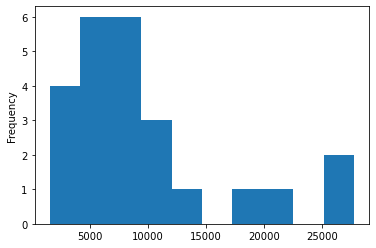

In [32]:
all_playoff_games.drop_duplicates('TeamID')['PlayoffMins'].plot.hist()

In [33]:
all_playoff_games

,GameID,GameDate,TeamID,OpponentTeamID,MATCHUP,PTS,OPTS,PointsPG,OppPointsPG,PointsPGOpponent,OppPointsPGOpponent,FG_PCT,PlusMinusClutch,Age,PlayoffMins,AdjustedPTS,AdjustedOPTS,PrevPTS,PrevOPTS,PrevMargin,SeriesGP,SeriesLead,SeriesWinPercent,MissingMins
0,0041600151,2017-04-15,1610612759,1610612763,SAS vs. MEM,111,82,105.3,98.1,100.5,100.0,0.429,100.0,29.133333,26118.571667,110.050671,82.713511,110.050671,82.713511,27.337160,1,0,0.000000,0.968826
1,0041600151,2017-04-15,1610612763,1610612759,MEM @ SAS,82,111,100.5,100.0,105.3,98.1,0.421,44.0,27.000000,9402.975000,82.713511,110.050671,82.713511,110.050671,-27.337160,1,0,0.000000,0.829182
2,0041600171,2017-04-15,1610612762,1610612746,UTA @ LAC,97,95,100.7,96.8,108.7,104.4,0.489,41.0,26.857143,9866.133333,97.844031,94.187511,97.844031,94.187511,3.656520,1,0,0.000000,0.825989
3,0041600171,2017-04-15,1610612746,1610612762,LAC vs. UTA,95,97,108.7,104.4,100.7,96.8,0.403,23.0,31.166667,19430.856667,94.187511,97.844031,94.187511,97.844031,-3.656520,1,0,0.000000,0.808528
4,0041600111,2017-04-15,1610612754,1610612739,IND @ CLE,108,109,105.1,105.3,110.3,107.2,0.414,-18.0,27.545455,9448.808333,108.939746,108.067776,108.939746,108.067776,0.871971,1,0,0.000000,0.823681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0041800404,2019-06-07,1610612744,1610612761,GSW vs. TOR,92,105,117.7,111.2,114.4,108.4,0.433,14.0,28.400000,24552.865000,90.457008,106.822144,107.171890,125.134512,-17.962621,4,-1,0.250000,0.708987
160,0041800405,2019-06-10,1610612761,1610612744,TOR vs. GSW,105,106,114.4,108.4,117.7,111.2,0.432,41.0,28.214286,14867.390000,103.238977,107.839498,106.822144,90.457008,16.365136,5,2,0.600000,0.749780
161,0041800405,2019-06-10,1610612744,1610612761,GSW @ TOR,106,105,117.7,111.2,114.4,108.4,0.433,14.0,28.400000,24552.865000,107.839498,103.238977,90.457008,106.822144,-16.365136,5,-2,0.200000,0.885196
162,0041800406,2019-06-13,1610612744,1610612761,GSW vs. TOR,110,114,117.7,111.2,114.4,108.4,0.433,14.0,28.400000,24552.865000,108.155118,115.978328,107.839498,103.238977,4.600521,6,-1,0.333333,0.770485


In [34]:
pd.Series(pts_model.coef_, index=offense_cols)

PlayoffMins            1.127047
Age                    0.244489
SeriesGP               2.020322
SeriesLead             0.064573
SeriesWinPercent       0.912665
MissingMins            1.338159
PrevMargin             1.412683
PointsPG               1.420477
OppPointsPGOpponent    1.946252
PrevPTS                1.445694
dtype: float64